<a href="https://colab.research.google.com/github/fsrt16/Financial-Analytics/blob/master/Spicejet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def funpreprocess(var):
  df = pd.read_csv(var)
  taget = 'Volume'
  nrows , ncols = df.shape
  df = df.drop_duplicates()
  from sklearn.utils import shuffle
  df = shuffle(df)
  Datetime=df['Date'].str.split('-', n = 3, expand = True)
  df['Year']=Datetime[0]
  df['Month']=Datetime[1]
  df['Day']=Datetime[2]
  import datetime 
  import calendar 
  def findDay(date):
    born=[]
    for i in range(0,len(date)):
      born.append(calendar.day_name[datetime.datetime.strptime(date[i], '%d %m %Y').weekday()] )

    return (born)
  x = findDay((df['Day']+" "+df['Month']+" "+df['Year']))
  df['dayname']=x
  df['Day'] = (df['Day']).astype(int)
  df['Month'] = (df['Month']).astype(int)
  df['Year'] = (df['Year']).astype(int)
  df['yr']=df['Year']-2000
  df['Open'] = df['Open'].fillna((df['Open'].mean()))
  df['High'] = df['High'].fillna((df['High'].mean()))
  df['Low'] = df['Low'].fillna((df['Low'].mean()))
  df['Close'] = df['Close'].fillna((df['Close'].mean()))
  df['Adj Close'] = df['Adj Close'].fillna((df['Adj Close'].mean()))
  df['Volume'] = df['Volume'].fillna((df['Volume'].mean()))
  return df


def FNCOL(var):
  fig, axs = plt.subplots(nrows=8 , figsize=(15,45))
  sns.boxplot(x="dayname", y=df[var], data=df,linewidth=2.5,ax=axs[0])
  sns.boxplot(x="Month", y=df[var], data=df,linewidth=2.5,ax=axs[1])
  sns.boxplot(x="Year", y=df[var], data=df,linewidth=2.5,ax=axs[2])
  sns.boxplot(x="Day", y=df[var], data=df,linewidth=2.5,ax=axs[3])
  sns.distplot(df[var], bins=20, kde=True, rug=True ,ax=axs[4]);
  sns.kdeplot(df[var], shade=True , ax=axs[4]);
  sns.scatterplot(x="yr", y=df[var], hue="dayname",data=df,ax=axs[5])
  sns.lineplot(x="Year", y=df[var],hue="dayname", data=df,ax=axs[6])
  sns.lineplot(x="Month", y=df[var],hue="dayname", data=df,ax=axs[7])


def FunBar(var):
  fig, axs = plt.subplots(nrows=6 , figsize=(15,80))
  sns.barplot(x="yr", y=df[var], data=df ,estimator=np.median,ax=axs[0])
  sns.barplot(x="dayname", y=df[var], data=df, estimator=np.median,ax=axs[1])
  sns.barplot(x="Month", y=df[var], data=df, estimator=np.median,ax=axs[2])
  sns.barplot(x="dayname", y=df[var], hue="yr", data=df,ax=axs[2])
  sns.barplot(x="Month", y=df[var], hue="yr", data=df,ax=axs[3])
  sns.barplot(x="yr", y=df[var], hue="dayname", data=df,ax=axs[4])
  sns.barplot(x="yr", y=df[var], hue="Month", data=df,ax=axs[5])
  
def candle():
  import plotly.graph_objects as go
  fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                  open=df['Open'],
                  high=df['High'],
                  low=df['Low'],
                  close=df['Close'])])
  fig.update_layout(xaxis_rangeslider_visible=False)
  fig.show()
  fig = go.Figure(data=[go.Candlestick(x=df['dayname'],
                       open=df['Open'], high=df['High'],
                       low=df['Low'], close=df['Close'])])
  fig.update_layout(  width=1000,
      height=500,xaxis_rangeslider_visible=False)

  fig.show()
  fig = go.Figure(data=[go.Candlestick(x=df['yr'],
                       open=df['Open'], high=df['High'],
                       low=df['Low'], close=df['Close'])])
  fig.update_layout(  width=1000,
      height=500,xaxis_rangeslider_visible=False)

  fig.show()
  fig = go.Figure(data=[go.Candlestick(x=df['Month'],
                       open=df['Open'], high=df['High'],
                       low=df['Low'], close=df['Close'])])
  fig.update_layout(  width=1000,
      height=500,xaxis_rangeslider_visible=False)

  fig.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df = funpreprocess('SPICEJET.BO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,dayname,yr
1755,2002-01-22,2.300000,2.600000,2.300000,2.350000,2.350000,22401.0,2002,1,22,Tuesday,2
4829,2014-04-24,16.530001,16.530001,16.530001,16.530001,16.530001,0.0,2014,4,24,Wednesday,14
448,1997-01-17,5.000000,5.000000,4.250000,4.500000,4.500000,5000.0,1997,1,17,Thursday,-3
3718,2009-11-04,35.500000,37.450001,33.650002,36.750000,36.750000,2526337.0,2009,11,4,Friday,9
2243,2003-12-05,6.550000,6.850000,6.550000,6.630000,6.630000,36600.0,2003,12,5,Monday,3


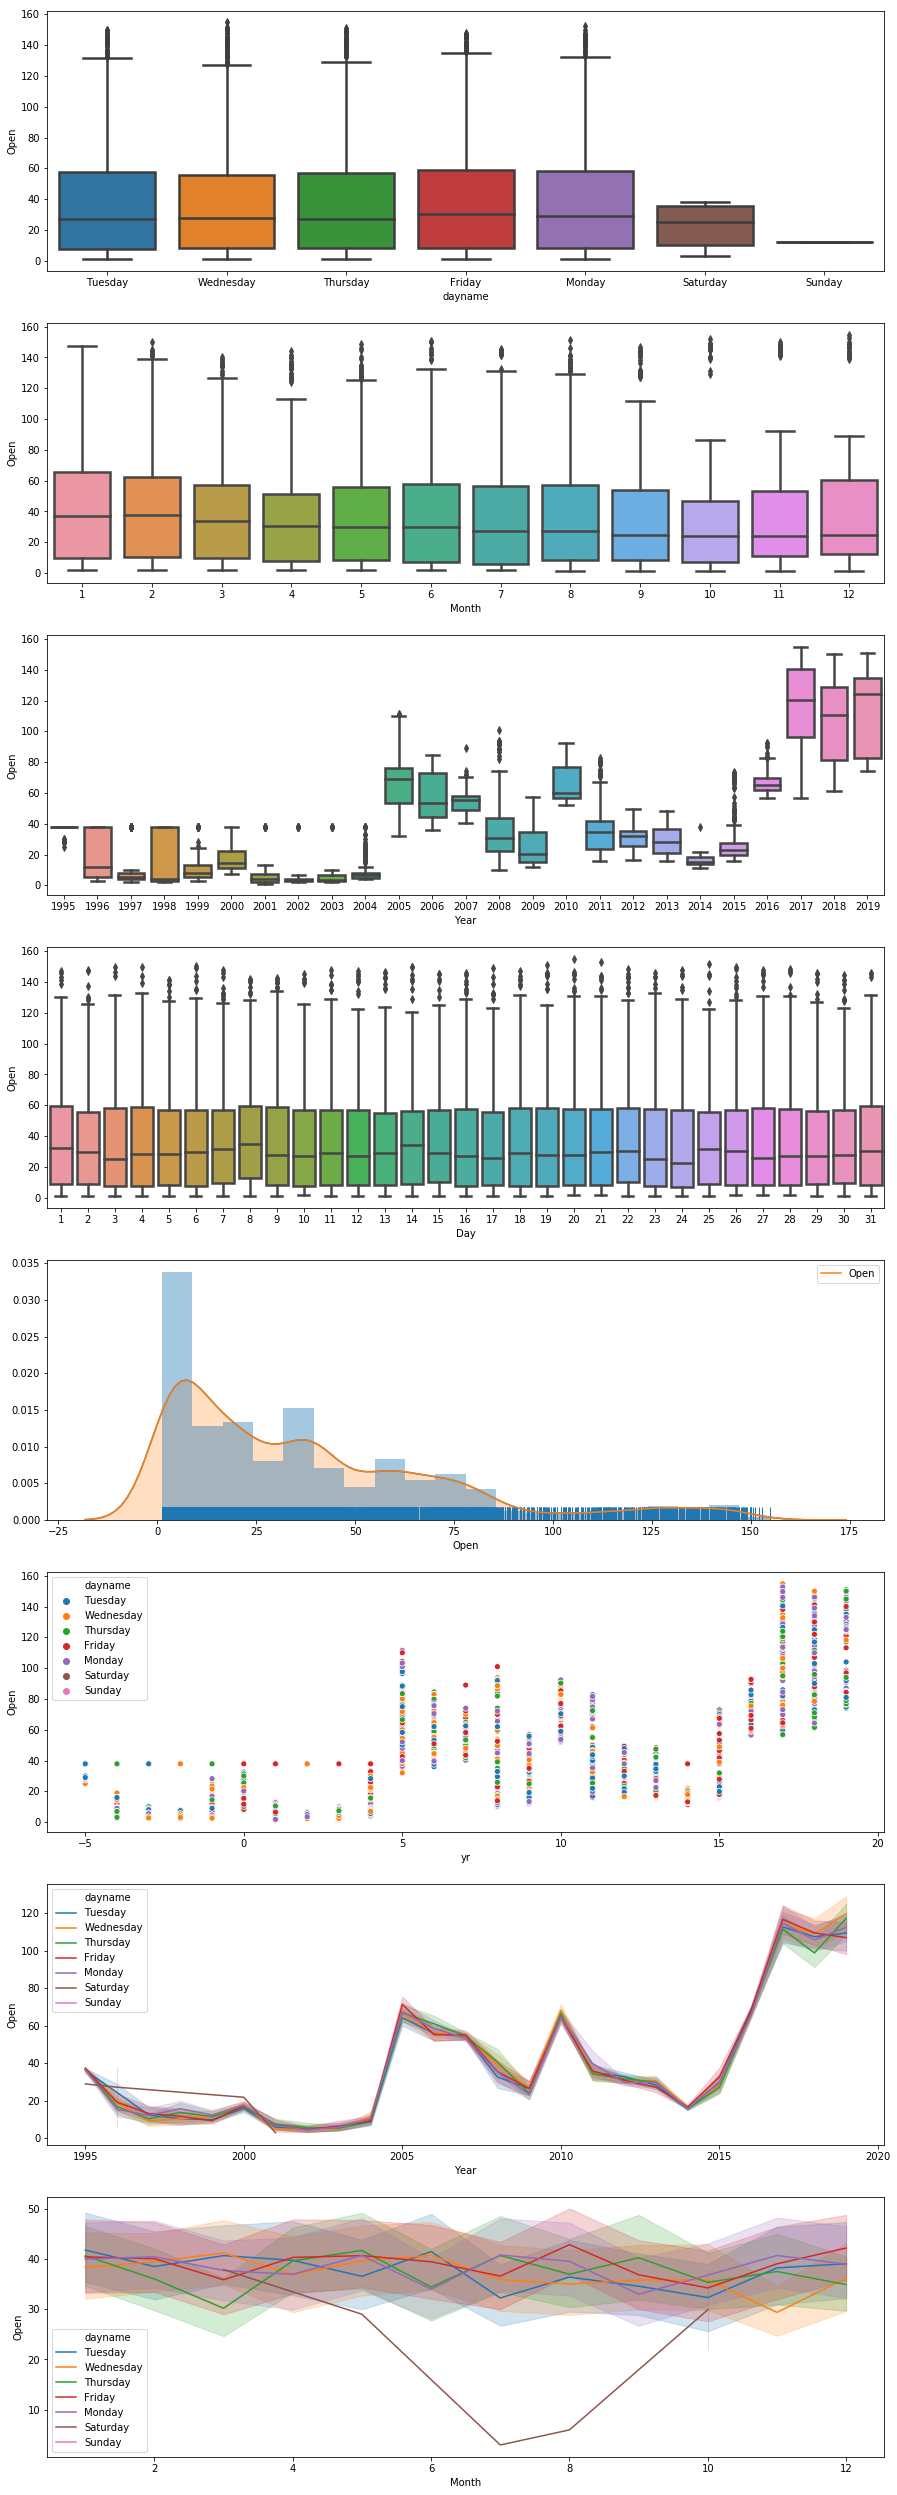

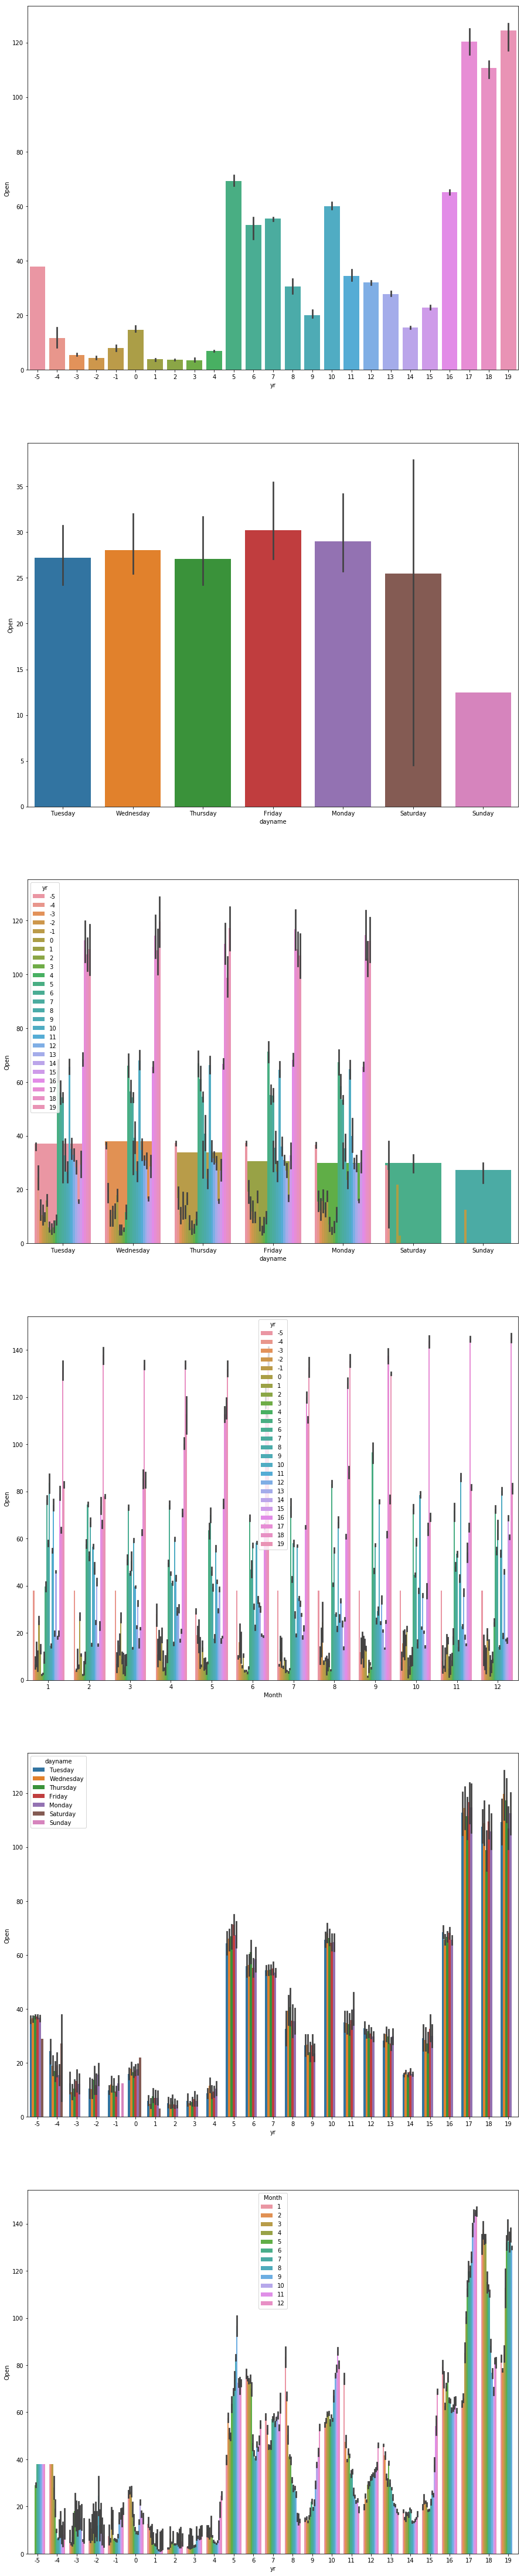

In [3]:
FNCOL("Open")
FunBar("Open")

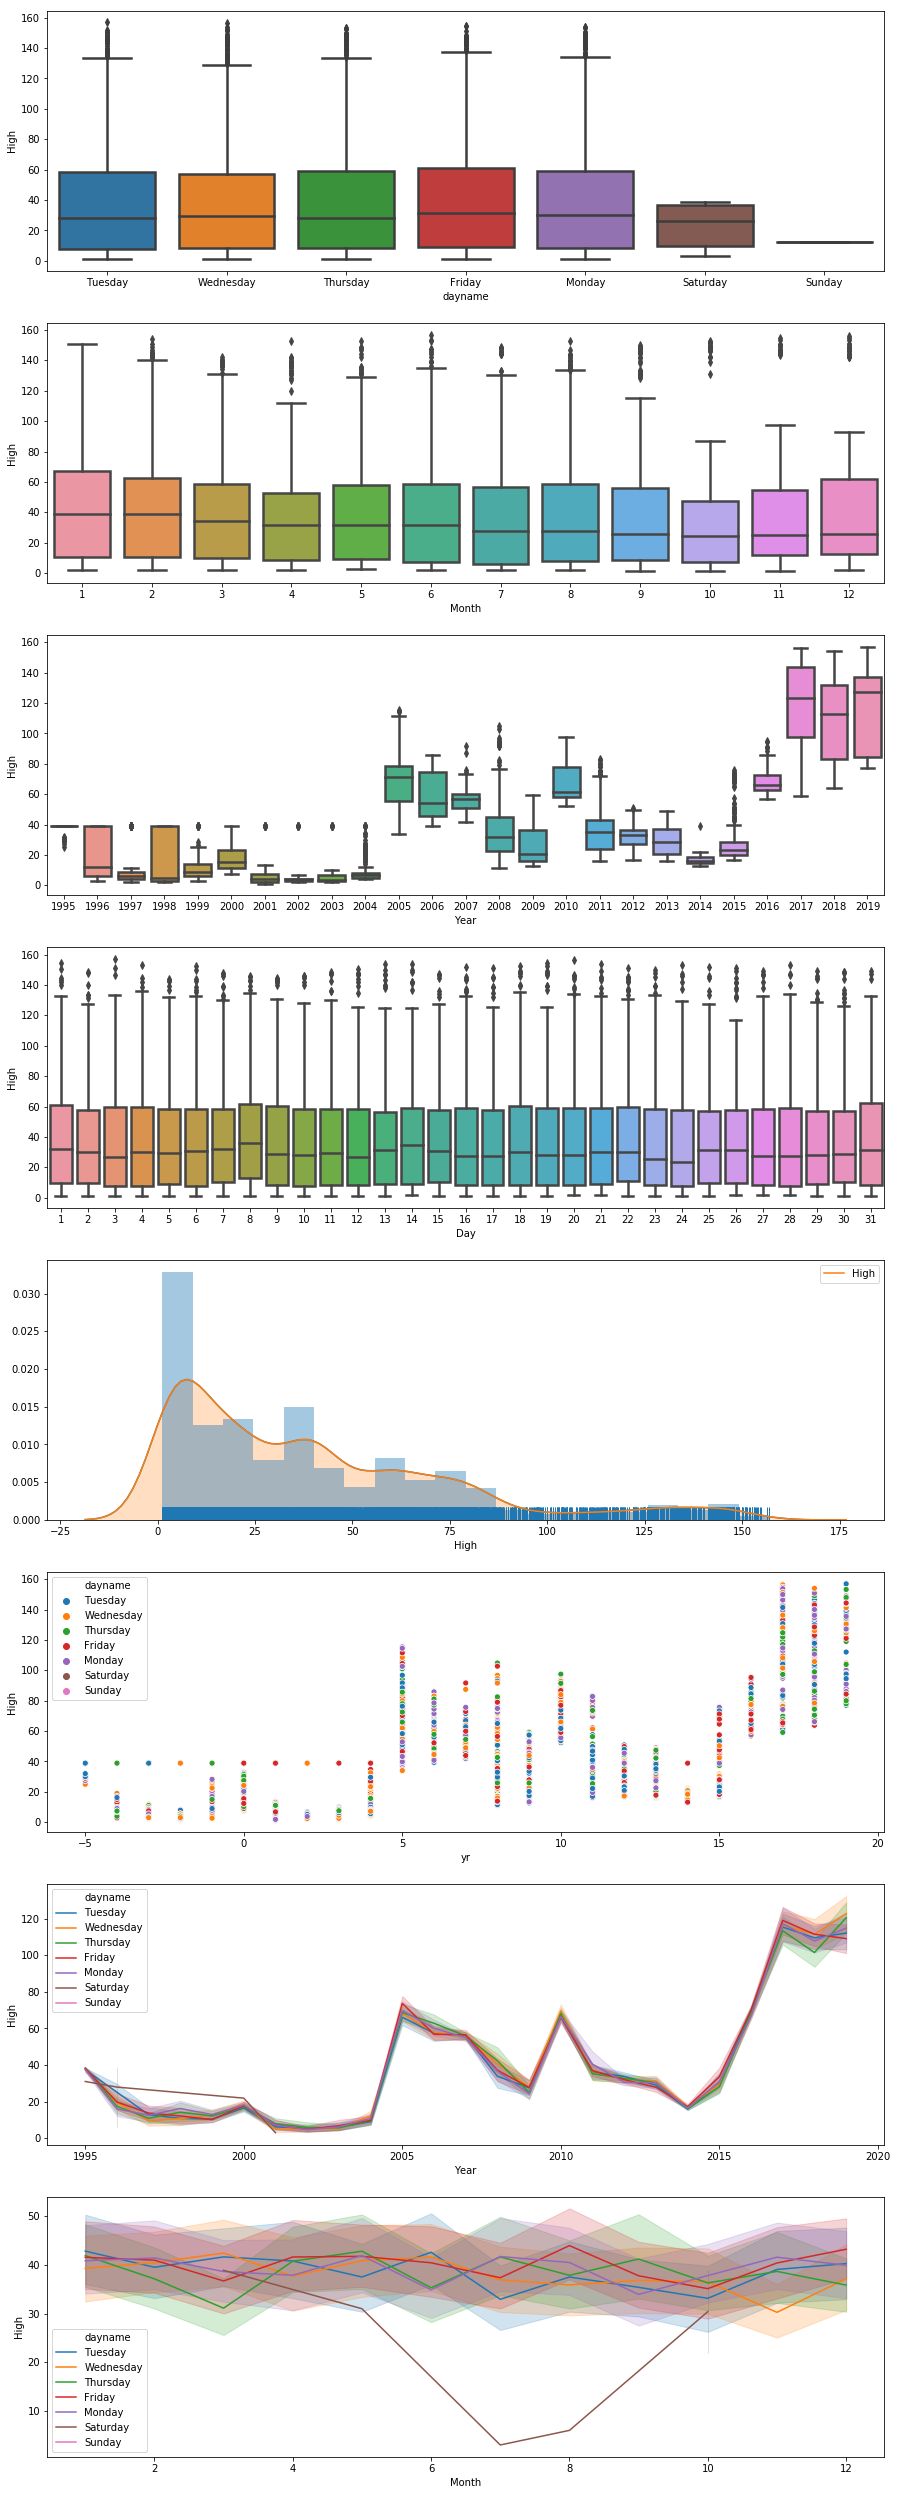

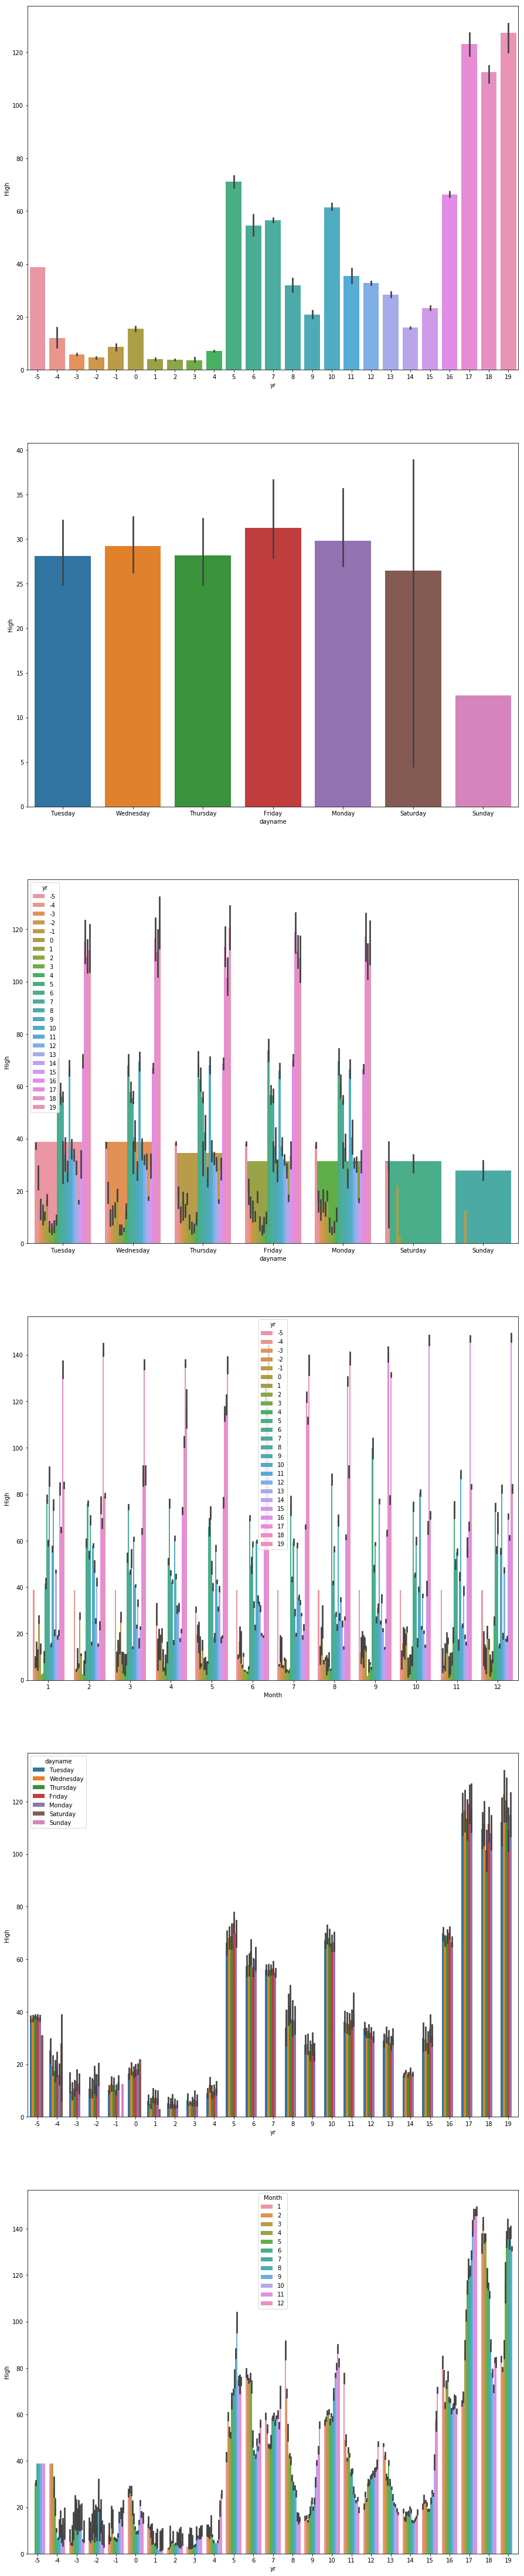

In [4]:
FNCOL("High")
FunBar("High")

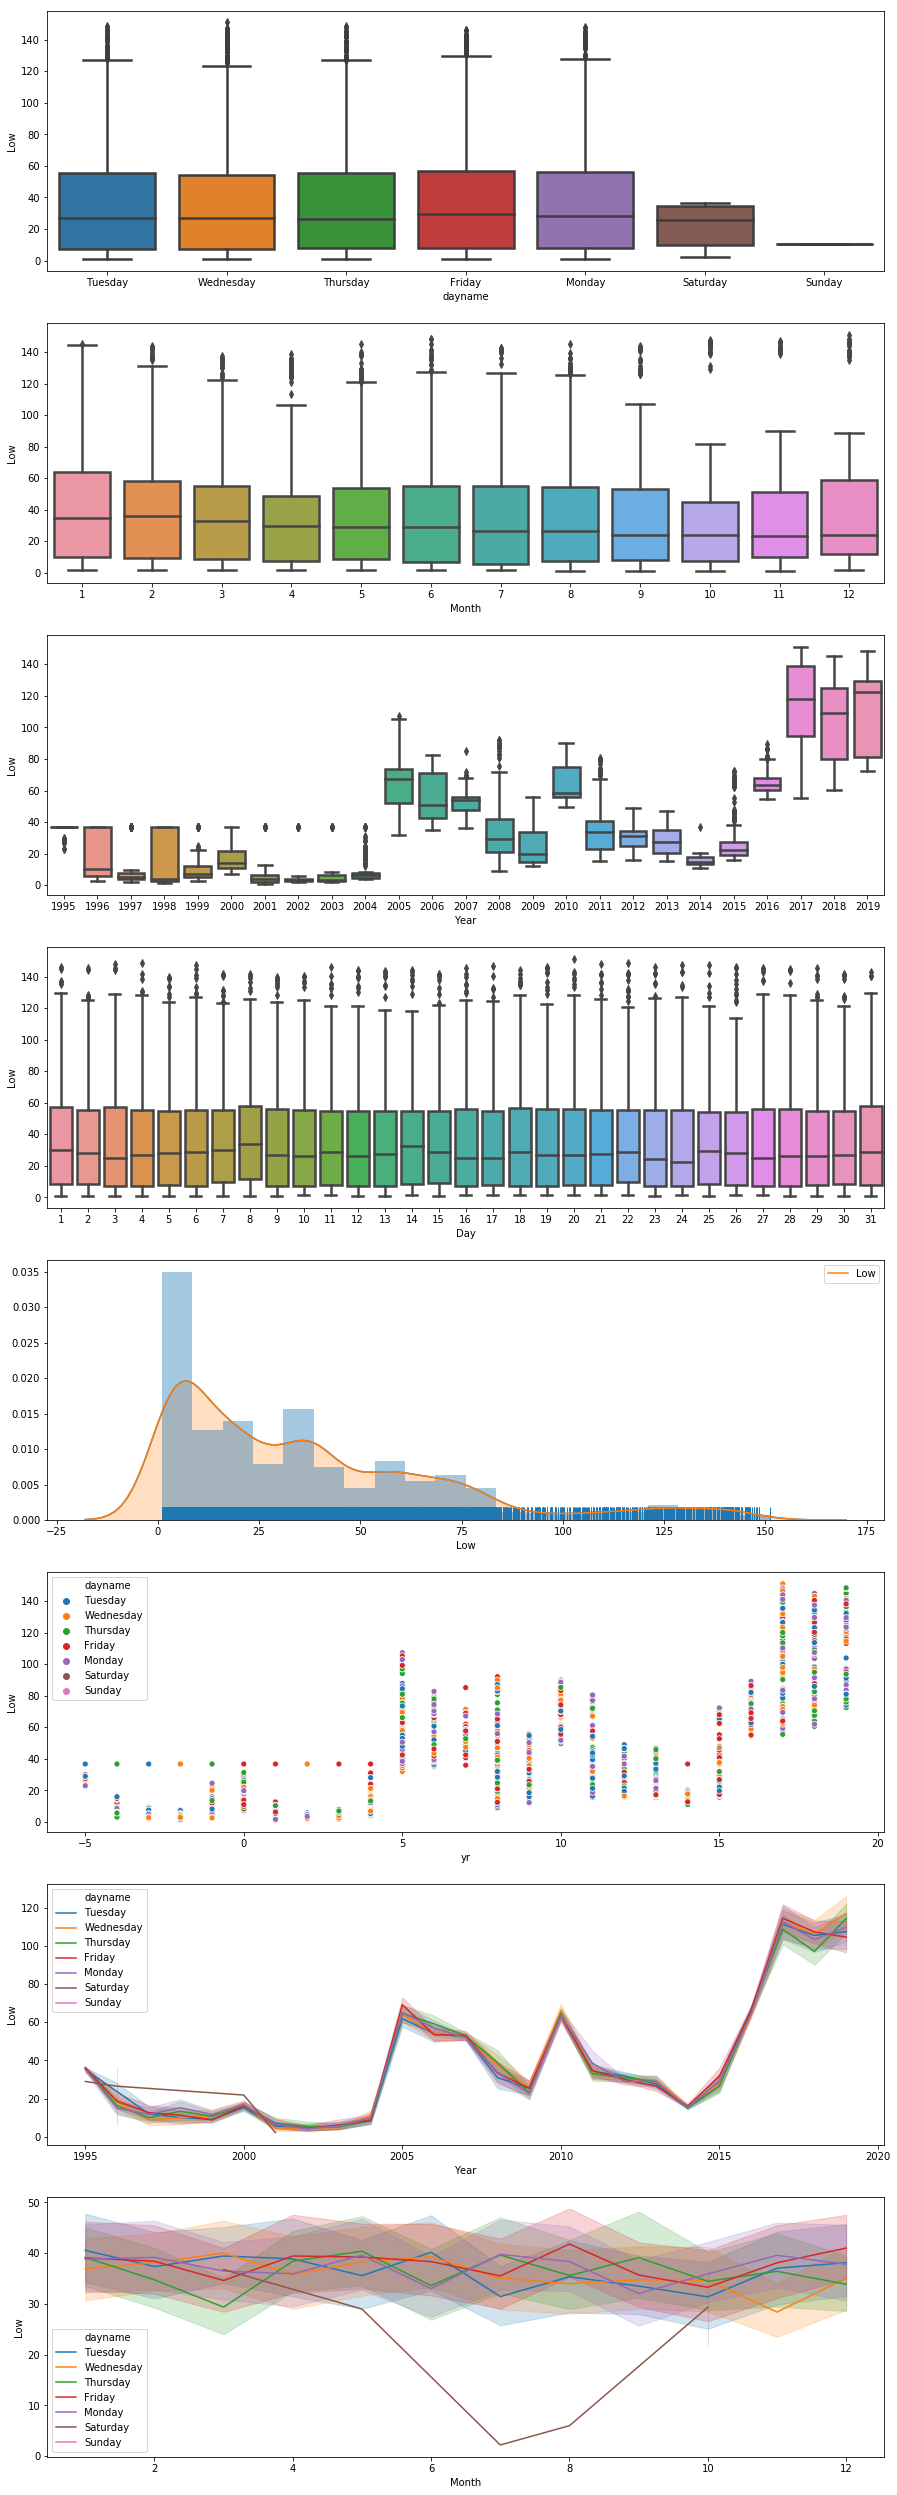

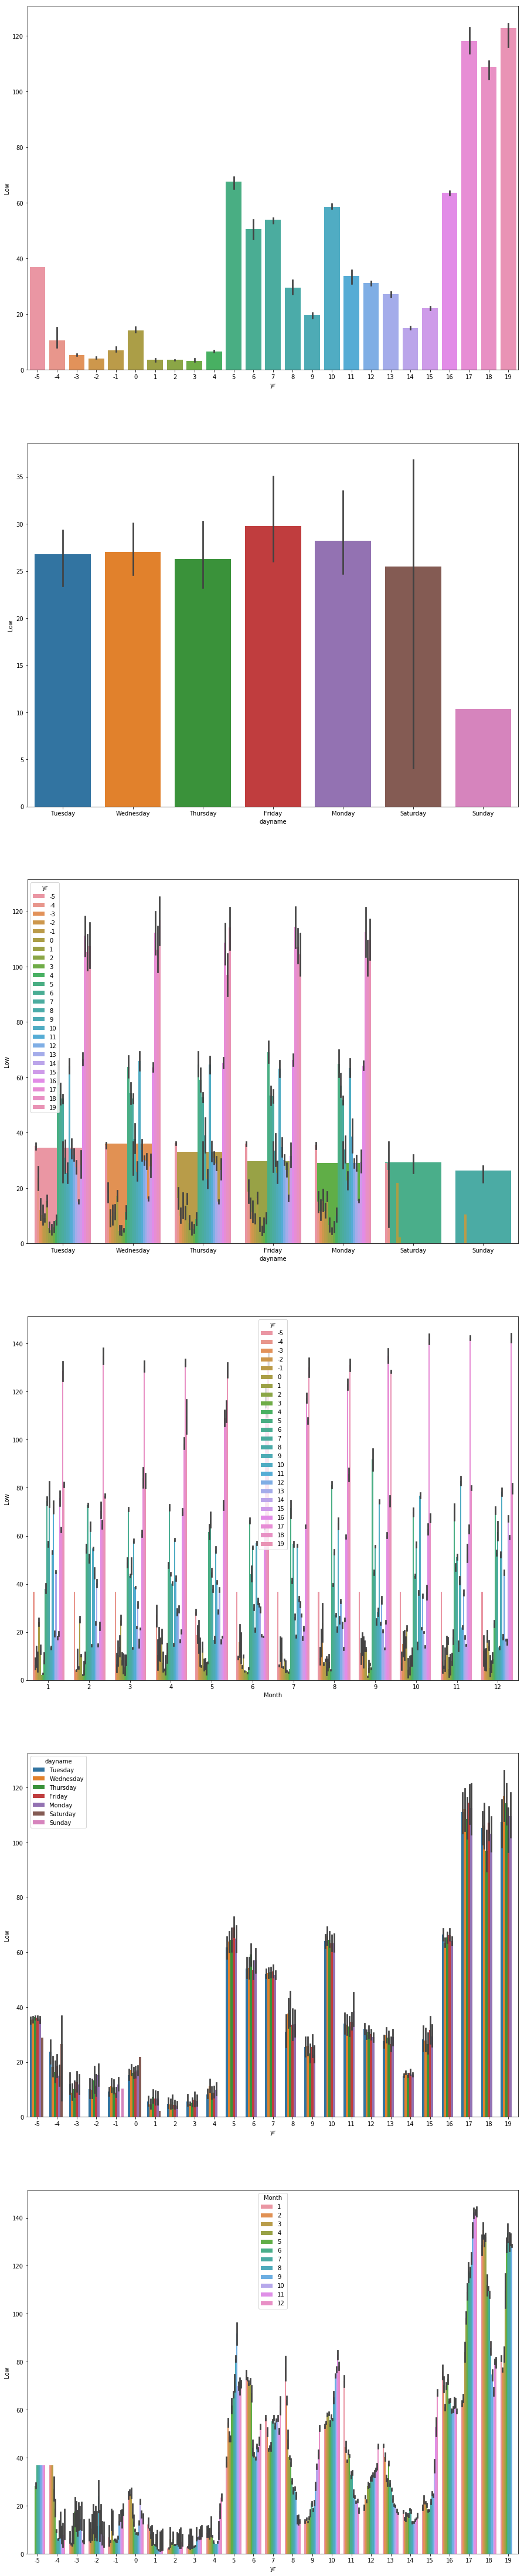

In [5]:
FNCOL("Low")
FunBar("Low")

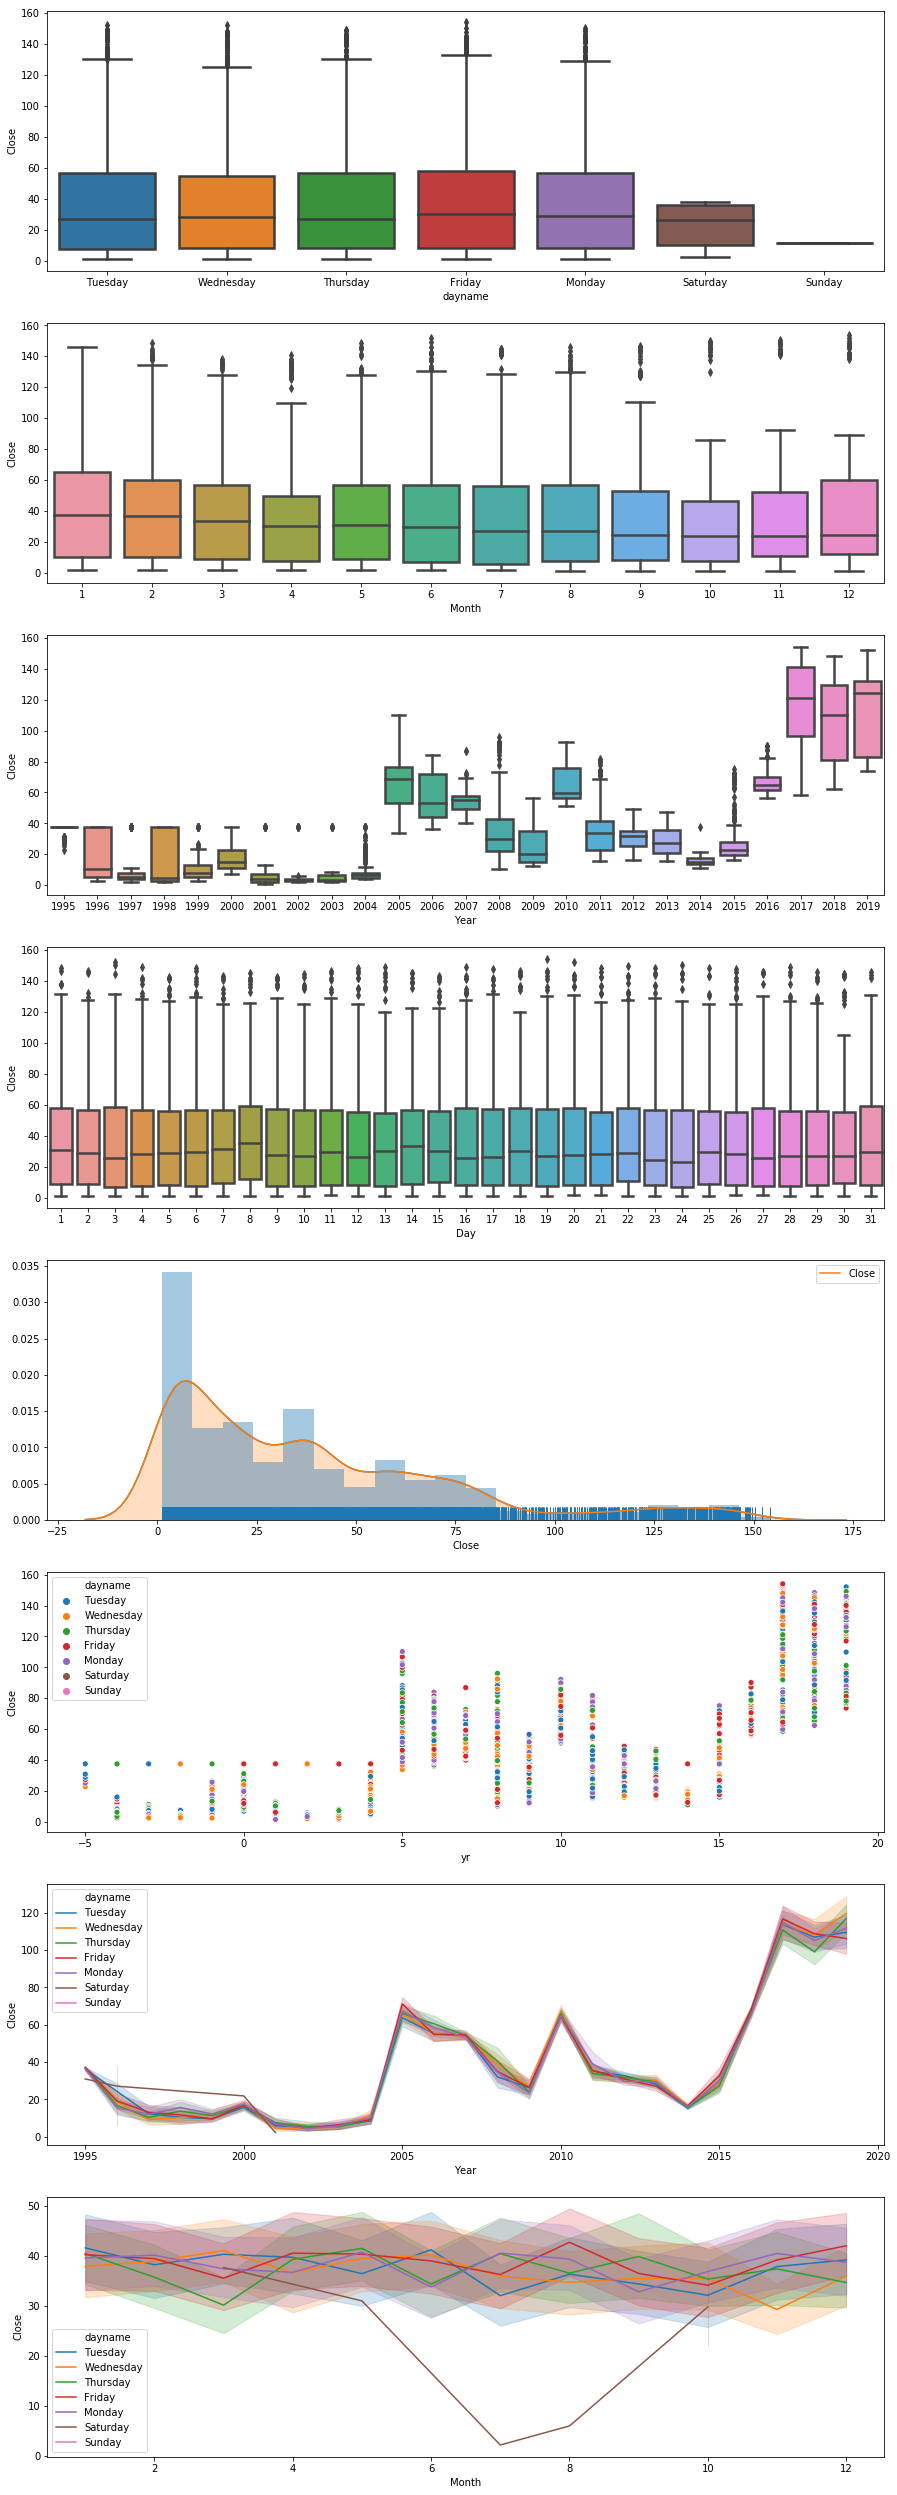

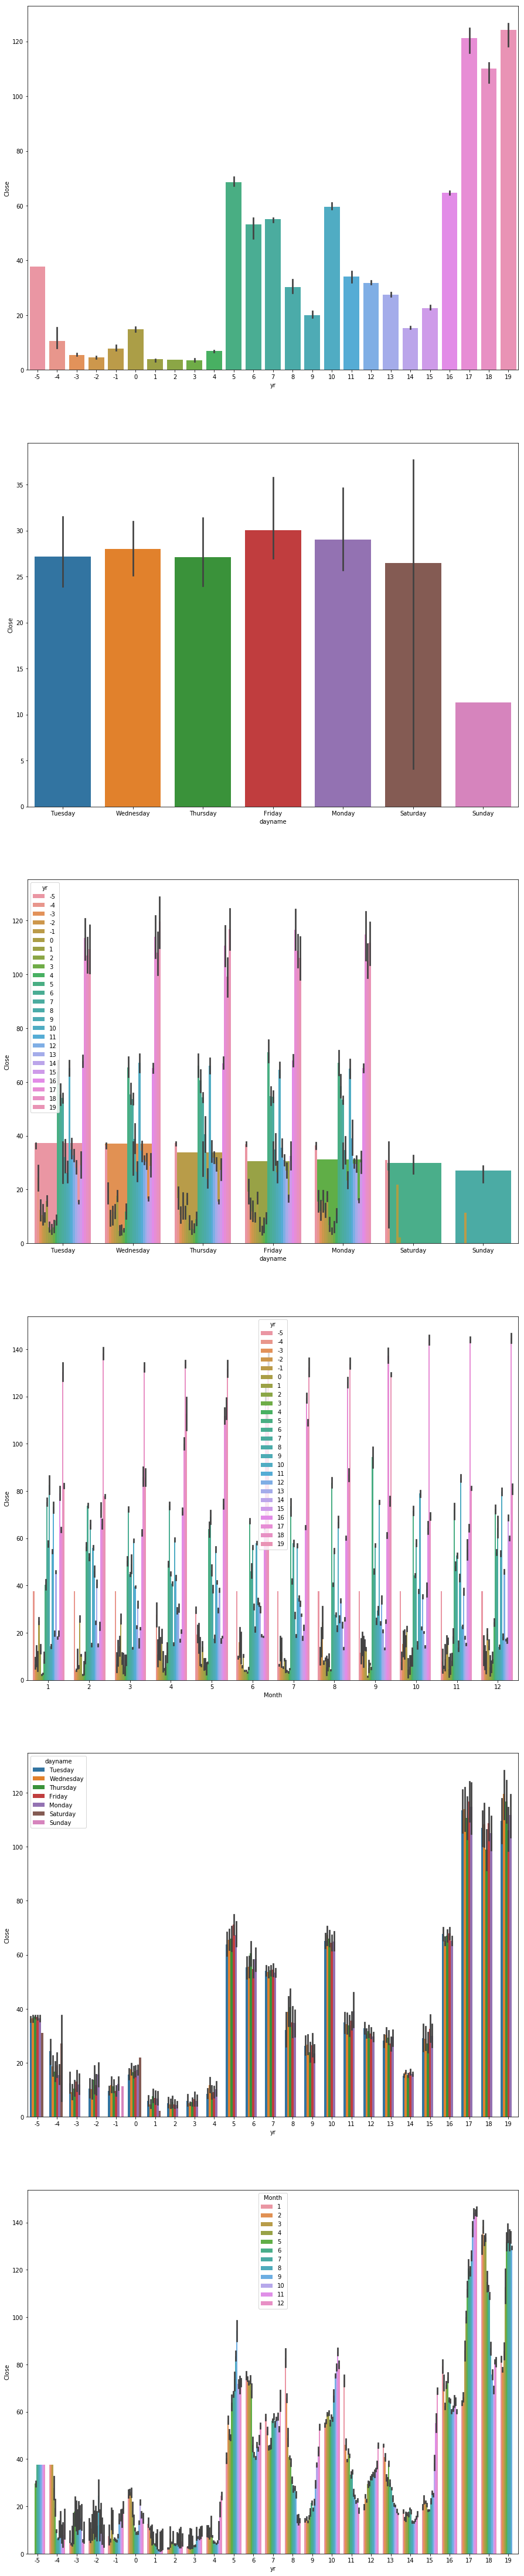

In [6]:
FNCOL("Close")
FunBar("Close")

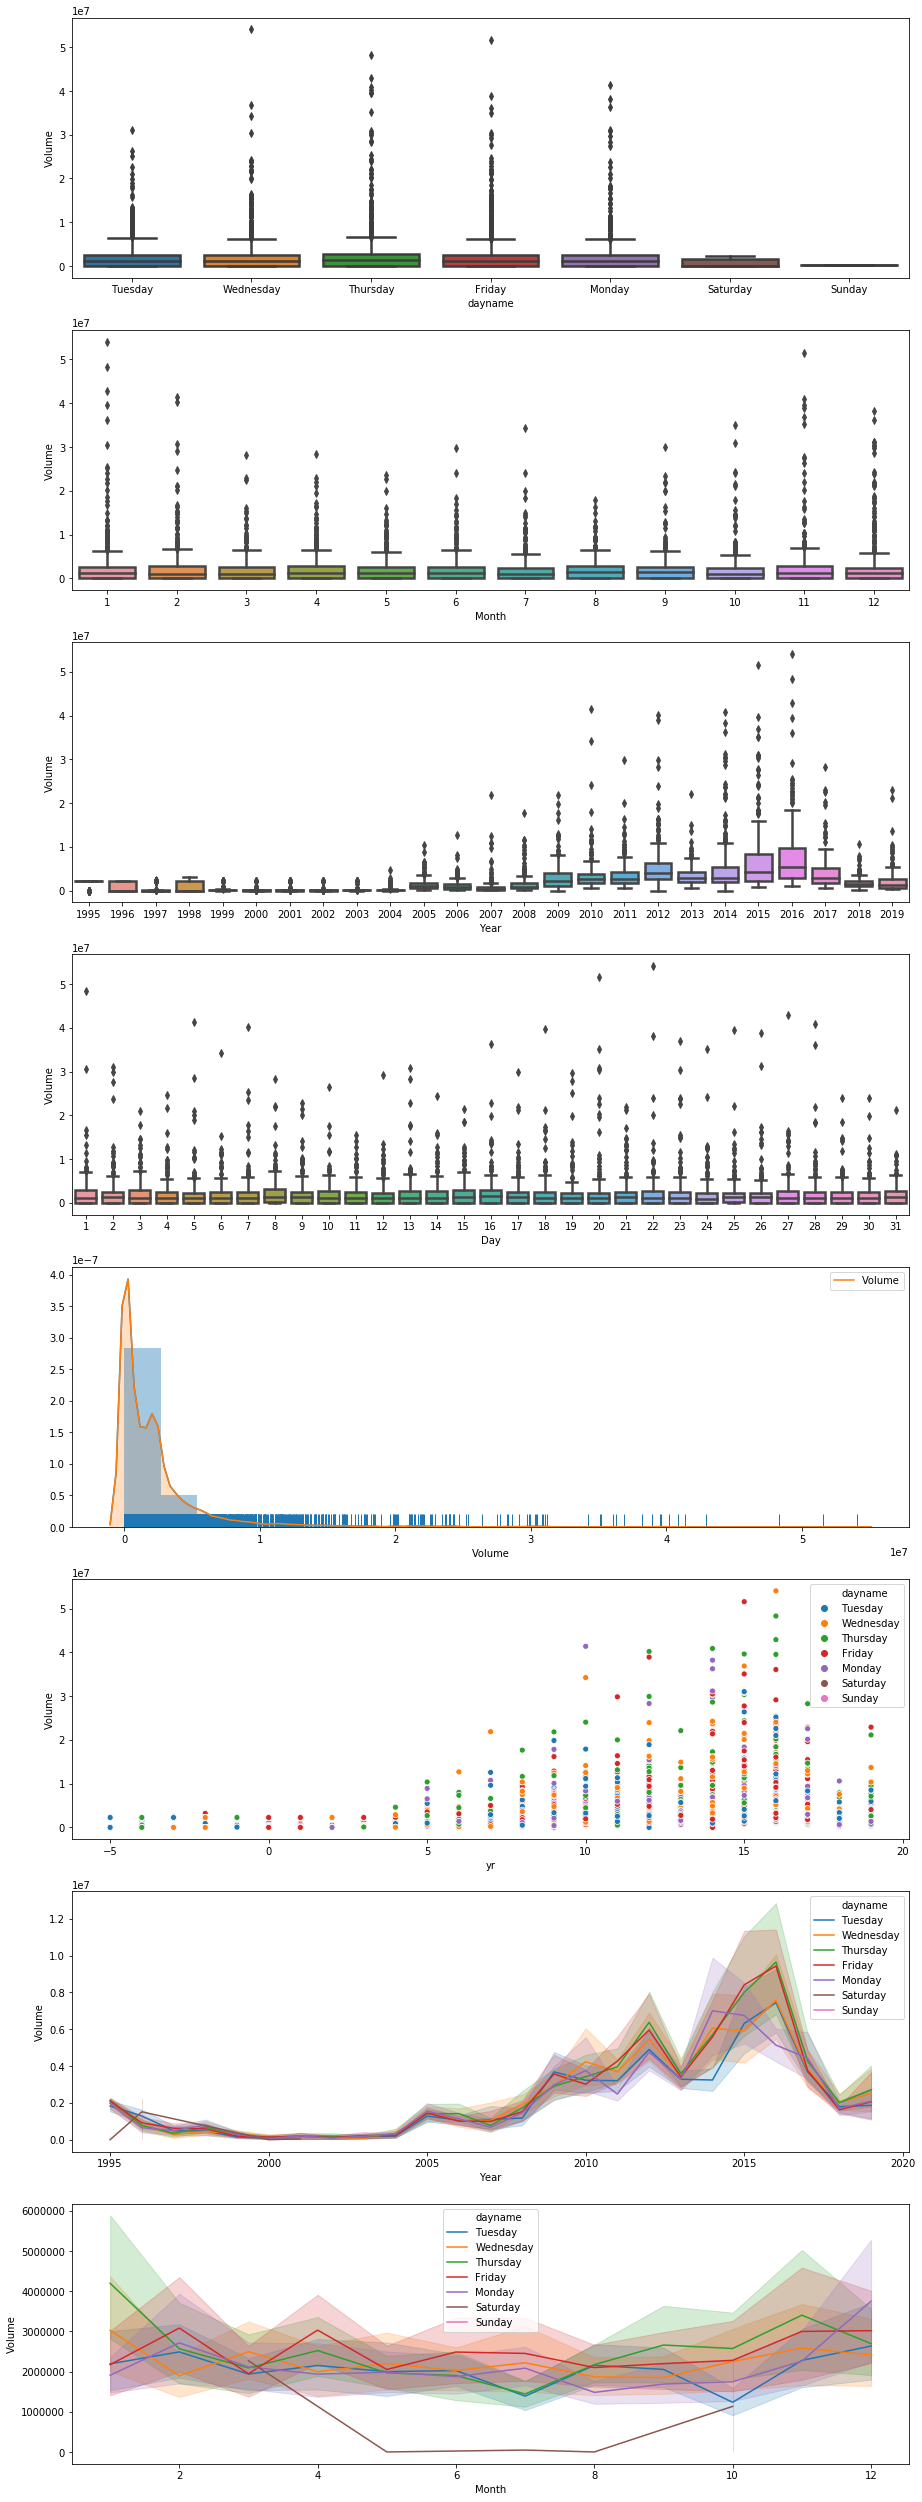

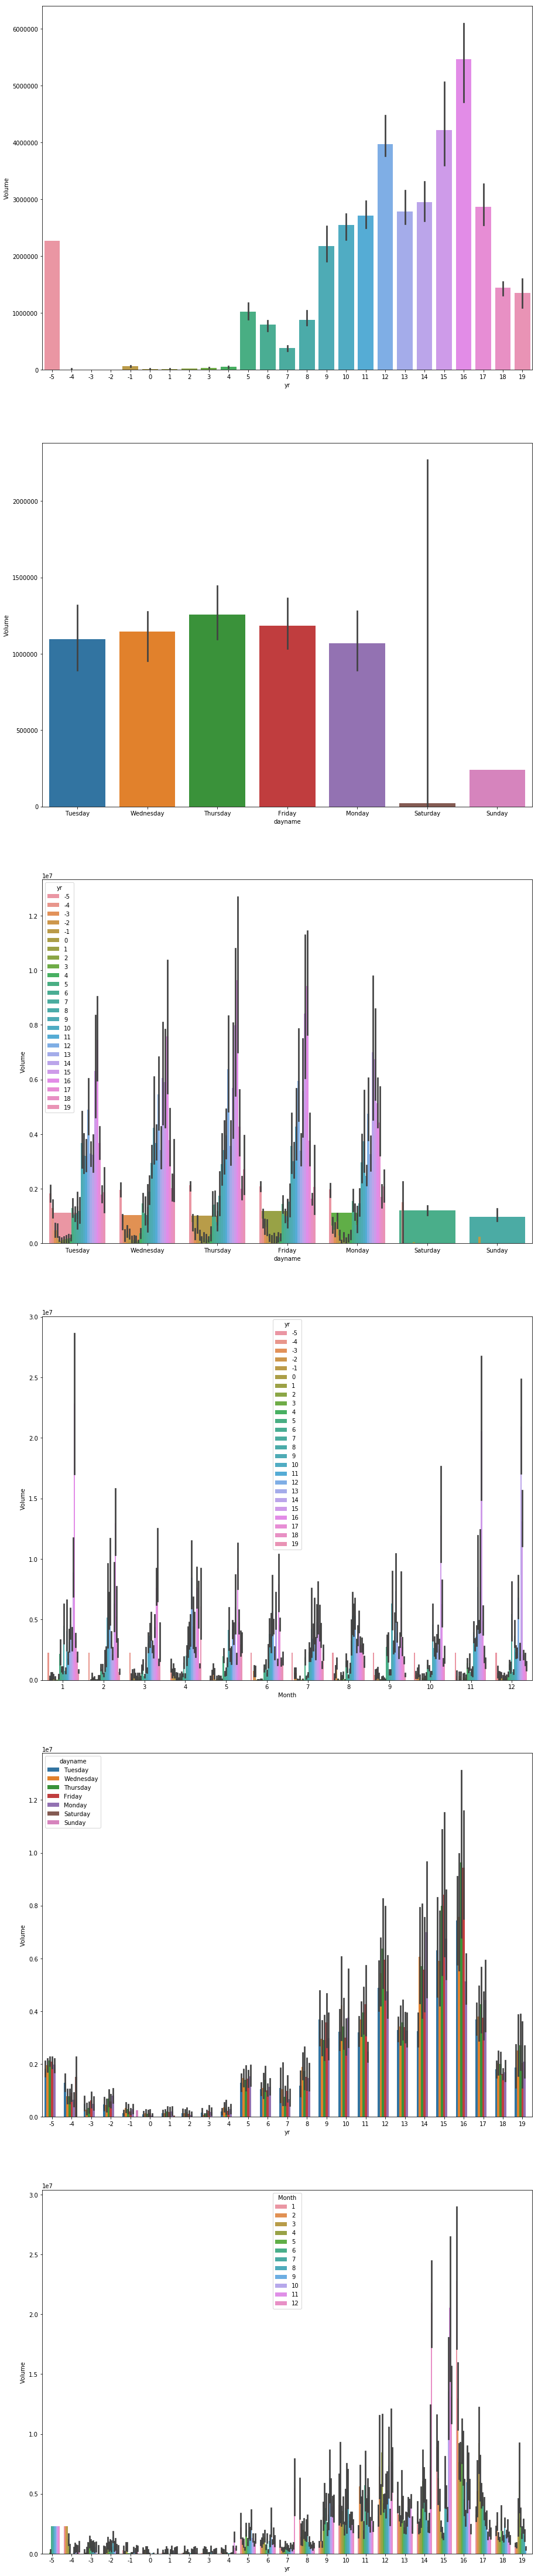

In [7]:
FNCOL("Volume")
FunBar("Volume")

In [8]:
candle()